## Folger Pinnacle Summer 2021

In [13]:
import onc
import helpers_hypoxic as hh
import helpers_ctd as hctd

import os
# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

### Hypoxia

"In ocean and freshwater environments, the term 'hypoxia' refers to low or depleted oxygen in a water body" (NOAA, 2019), and is quantitatively recognized as when oxygen levels drop below 2-3 milligrams of oxygen per litre of water (EPA, 2025). Hypoxia is a significant stressor to marine ecosystems, and has been associated with mass movement and or die off of species ().

- placeholder

### Causes

Extreme hypoxia occurs when oxygen in the ocean gets used up faster than it can be replaced. The drivers of this are wide in variety and can be both physical and biological. These include

- placeholder

### Consequences

- placeholder

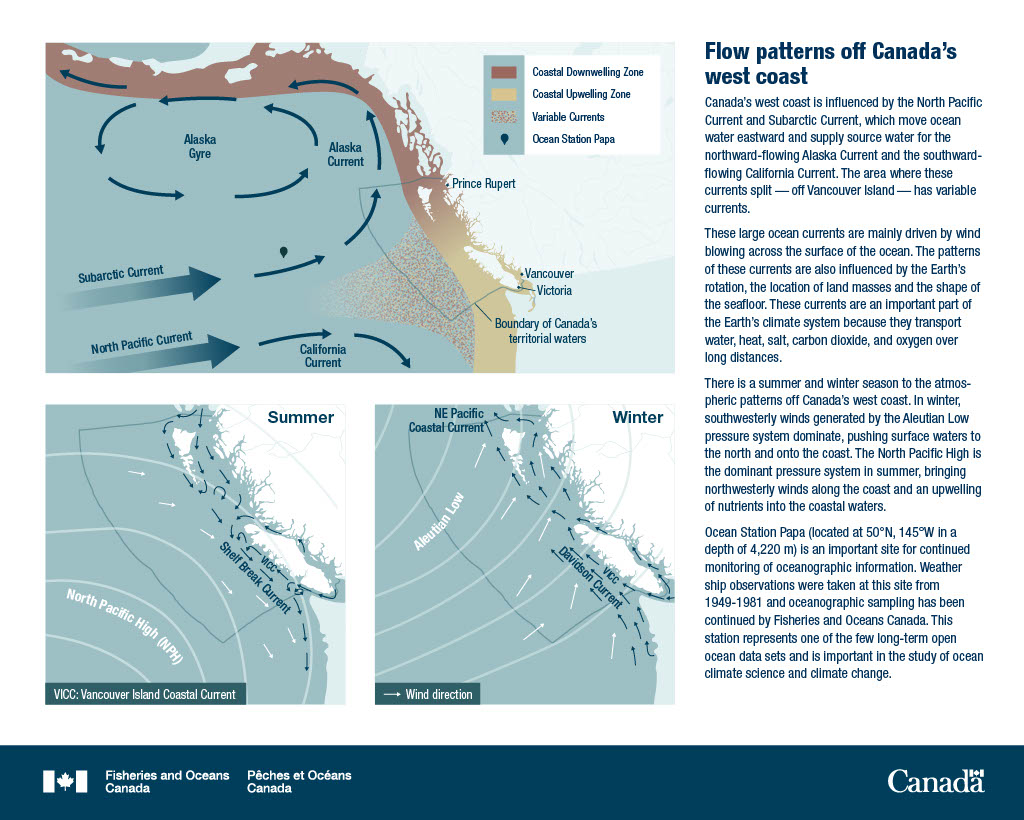

In [14]:
from IPython.display import Image, display
display(Image(filename='/Users/catherinebertozzi/jupyter-practice/deepnote/upwelling_downwelling.jpg'))

## Visualizing the Data: Key Ocean Health Indicators

![Folger Neptune Map](https://cdn.onc-prod.intergalactic.space/folgerpassage_300dpi_ff2a03c373.jpg)

ONC's node at Folger Pinnacle, located at approximately 25 meters of deep, is equipped with a selection of sensors that capture a variety of metrics including

- Dissolved oxygen (mL/L): The amount of oxygen gas dissolved in seawater, i.e. the oxygen available for marine organisms to breathe.

- Photosynthetically Active Radiation or PAR (μmol photons m⁻² s⁻¹): The amount of sunlight (in the 400–700 nm wavelength range) reaching a square meter of water surface per second. This is the light that phytoplankton use to photosynthesize.

- Chlorophyll concentration (µg/L): The amount of chlorophyll-a pigment in the water, which is used as a proxy for phytoplankton biomass.

- Temperature of the water (°C): The temperature of the water at a given depth.

- Salinity (PSU): The concentration of dissolved salts in seawater.

- Turbidity (NTU): How cloudy or murky the water is, based on the amount of suspended particles.

In [15]:
# Properties of interest
propCodes = ["oxygen", "parphotonbased", "chlorophyll", "seawatertemperature", "salinity", "turbidityntu"]

In [16]:
# Entire year
jan = "2021-01-01T00:00:00.000Z"
dec = "2022-01-01T00:00:00.000Z"

# Season: April through November 2021
apr = "2021-04-01T00:00:00.000Z"
nov = "2021-11-15T00:00:00.000Z"

# Low oxygen: July through August 2021
jul_9 = "2021-07-09T00:00:00.000Z"
aug_11 = "2021-08-11T12:00:00.000Z"

# High chlorophyll: September through November 2021
sept_15 = "2021-09-15T00:00:00.000Z"
nov_1 = "2021-11-01T00:00:00.000Z"

In [17]:
# fetch dataframe of properties data for each time frame
year_indicators = hh.get_dataframe(jan, dec, propCodes)
season_indicators = hh.get_dataframe(apr, nov, propCodes)
low_ox_indicators = hh.get_dataframe(jul_9, aug_11, propCodes)
high_chlor_indicators = hh.get_dataframe(sept_15, nov_1, propCodes)

## Identifying Events

> NOTE: All data shown has been fetched via the API function call 'getScalarData' with a ReSampling Period of 1800 seconds. 

### Entire Year - 2021

start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


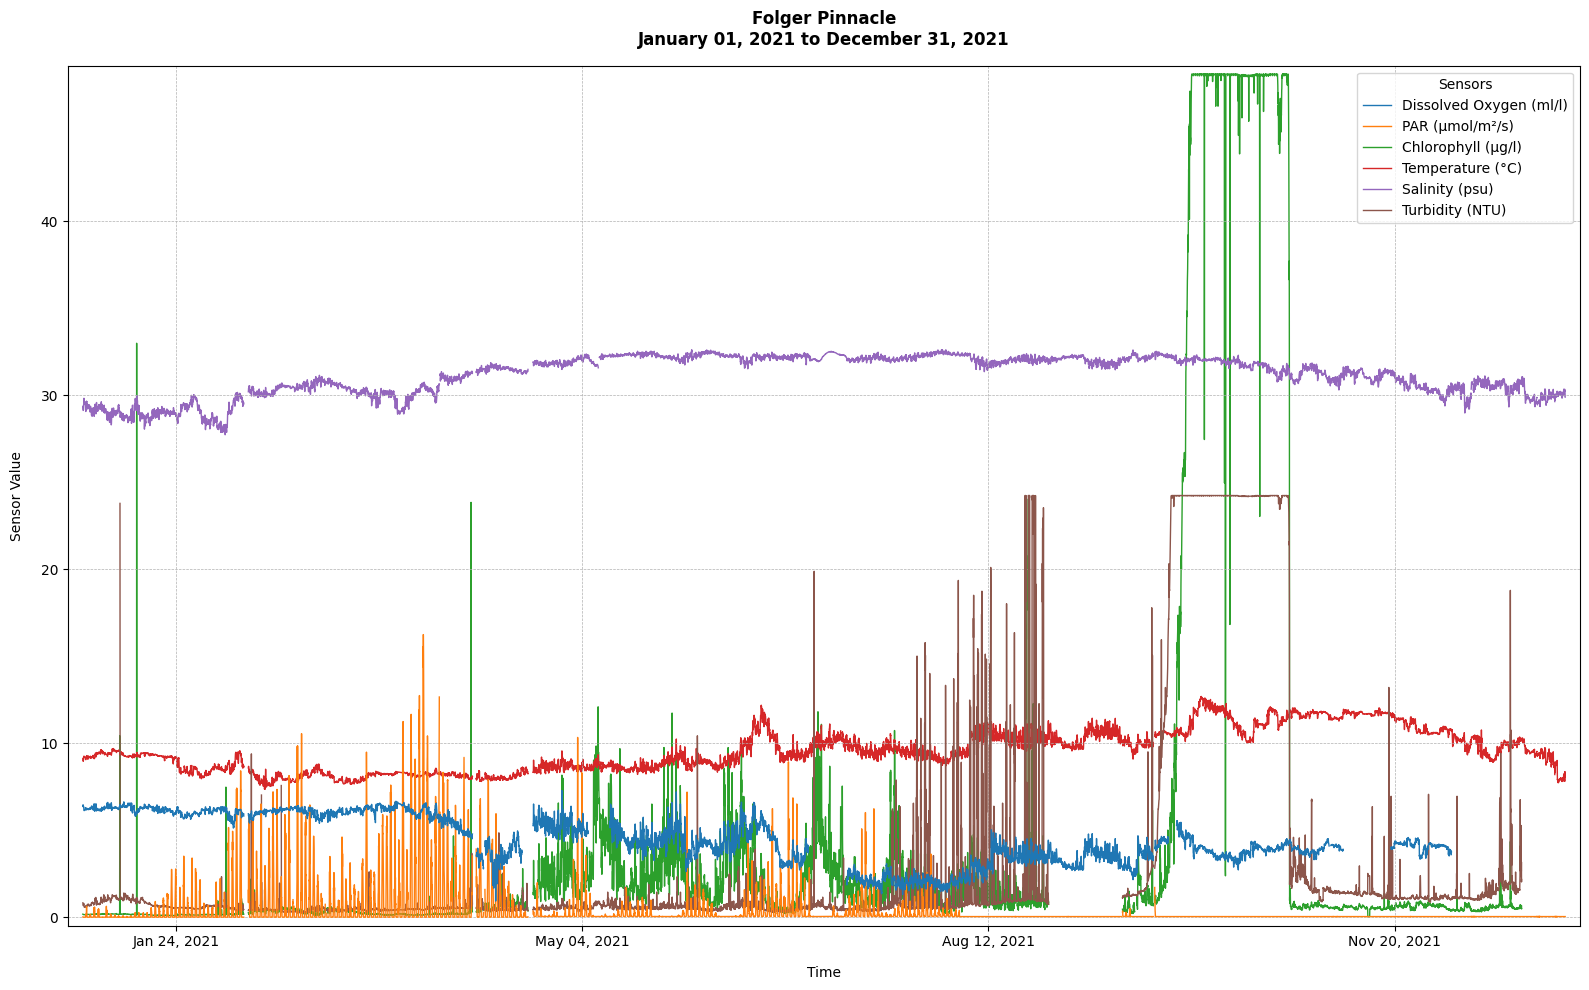

In [18]:
# Entire year
hh.plot_all(df=year_indicators, title="Folger Pinnacle")

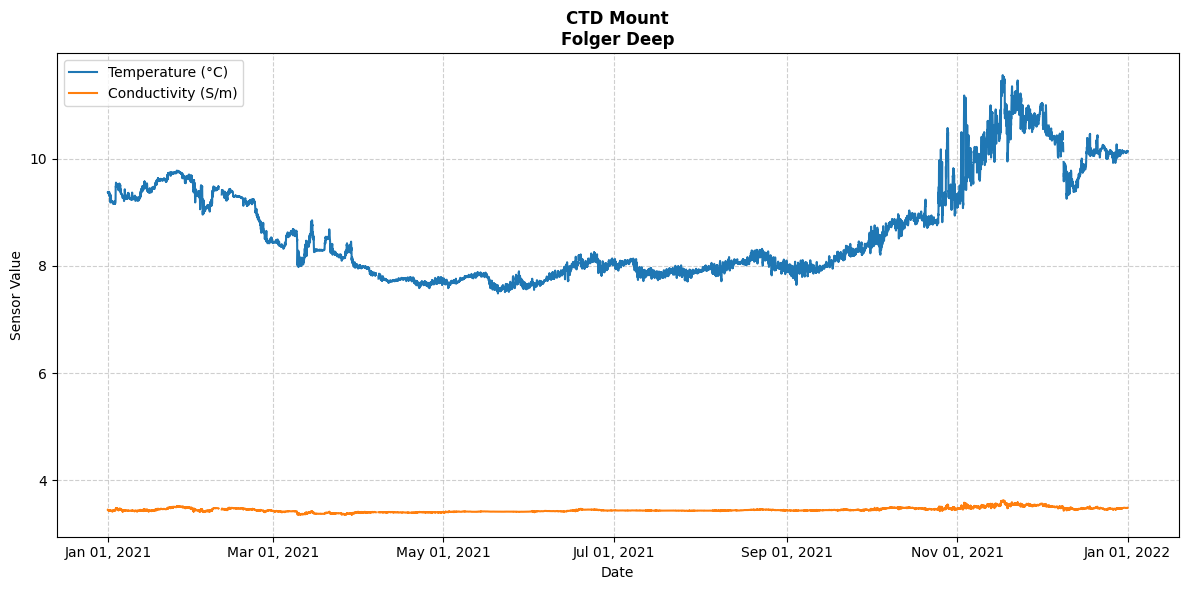

In [19]:
# TODO: get folger deep oxygen data
# 
#  FOLGER DEEP - 2021 - CTD DATA - TEMPERATURE AND SALINITY
yr_21_start = "2021-01-01T00:00:00.000Z"
yr_21_end = "2022-01-01T00:00:00.000Z"

locationDeep = "FGPD" # locationCode for Folger Deep
sensorCategories = ["temperature","conductivity"]
yr_21_mount_all_deep = hctd.get_property(start=yr_21_start, end=yr_21_end, locationCode=locationDeep, sensorCategoryCodes=sensorCategories, resample=1800)

hctd.plot_longterm_mount(df=yr_21_mount_all_deep, locationCode=locationDeep, sensor_cols=sensorCategories)

### Apr to Nov

start df: 2021-04-01 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


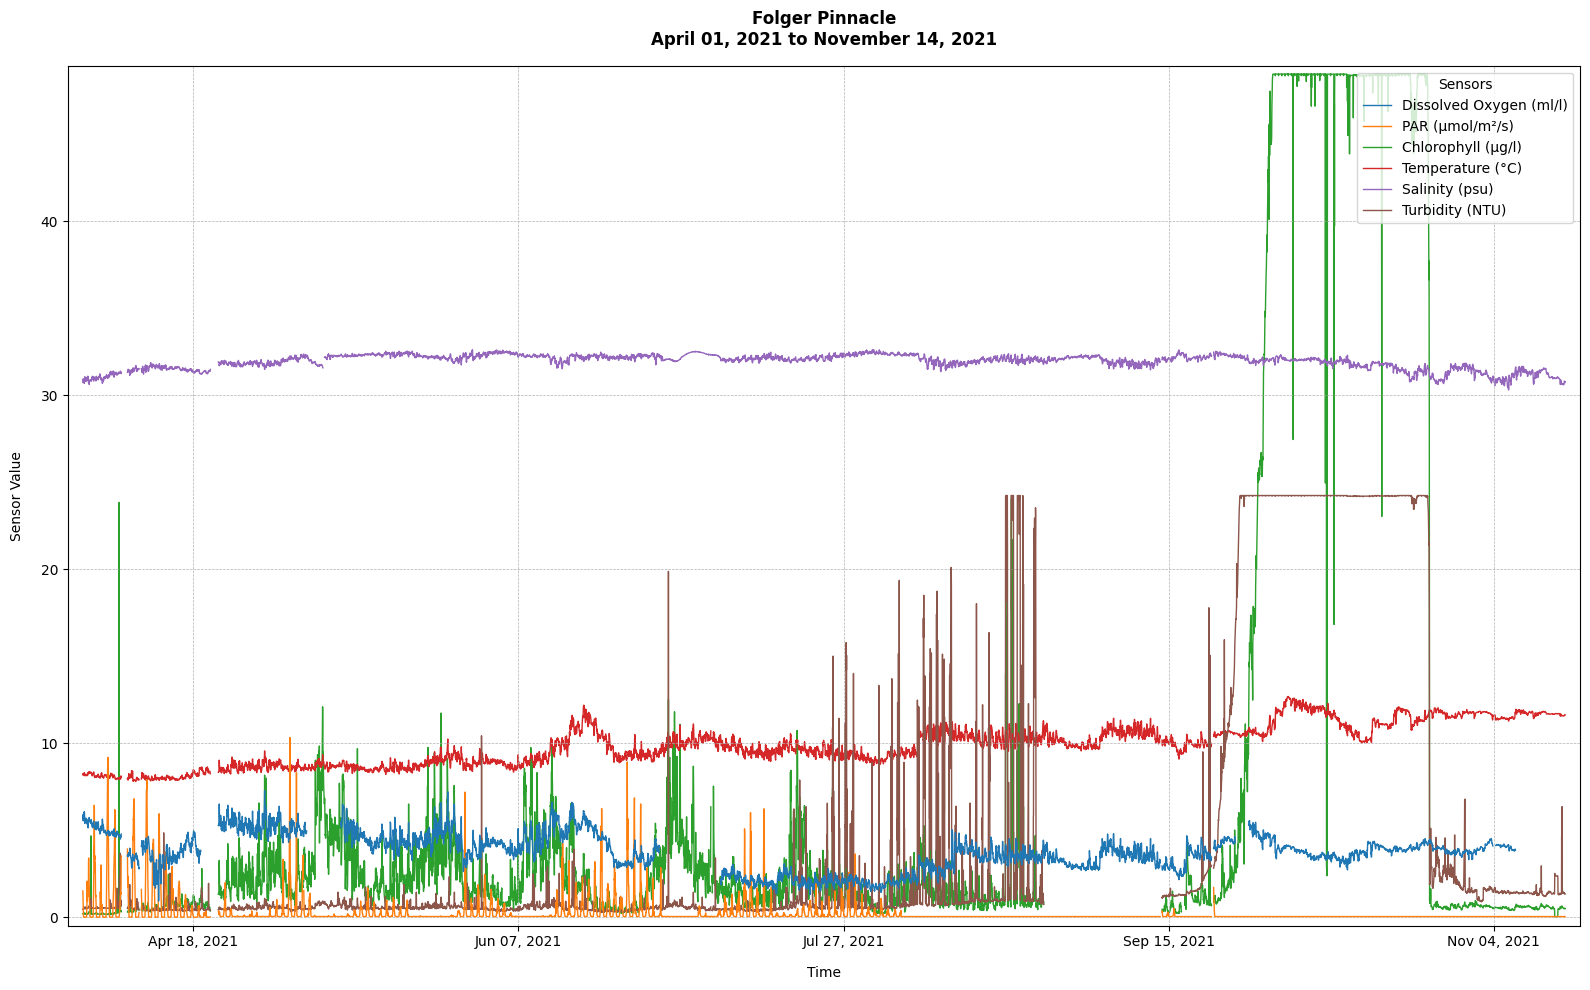

In [20]:
# Season
hh.plot_all(df=season_indicators, title="Folger Pinnacle")

> NOTE: Any plot labeled with "Denoised" has been processed to remove outliers and apply a rolling mean.

### Low Oxygen - Jul to Aug

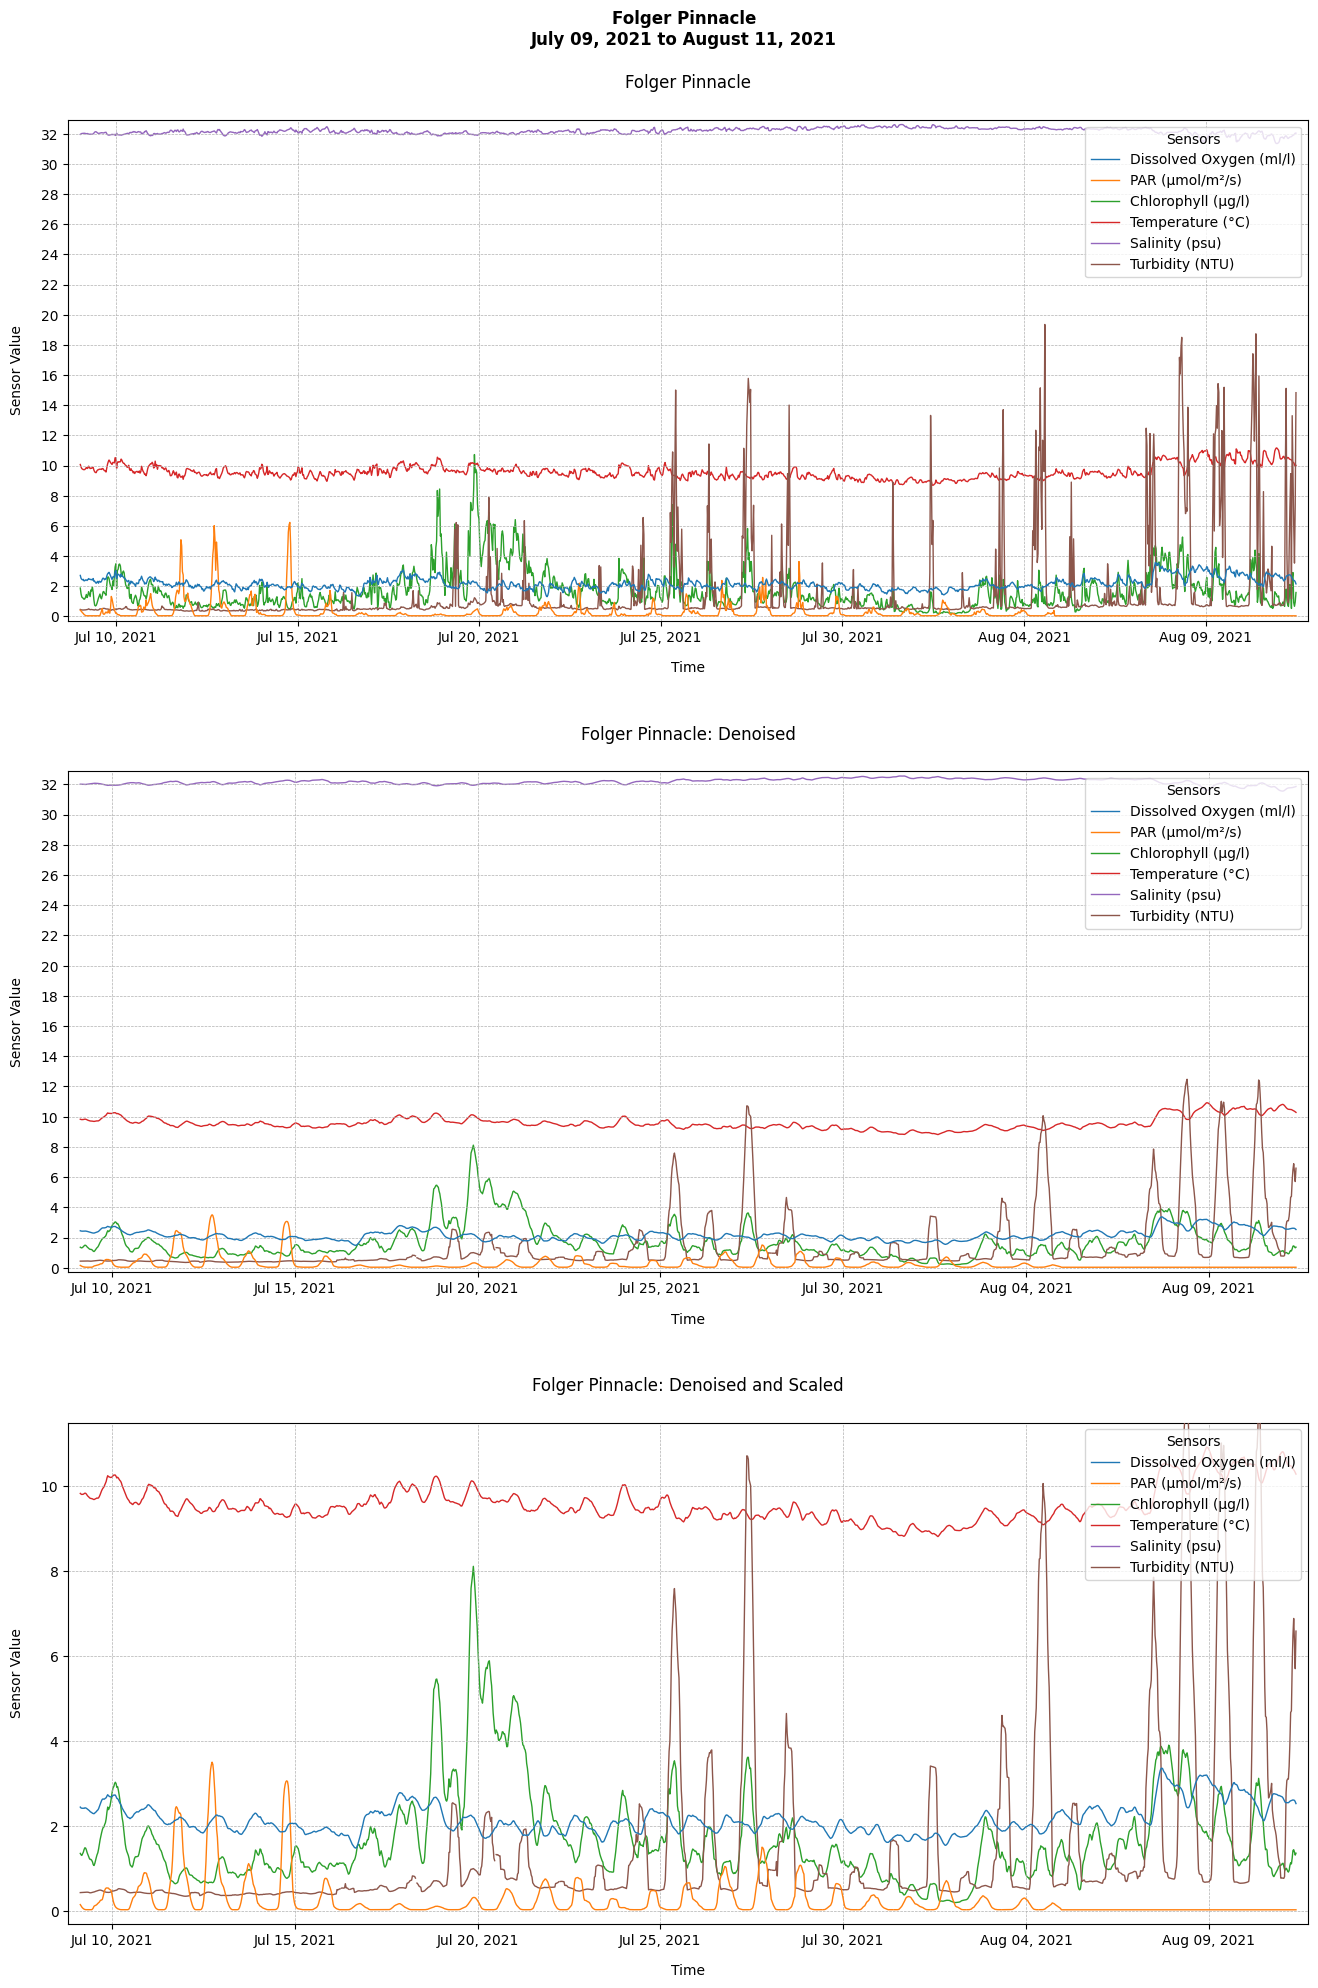

In [21]:
# July through August
hh.plot_all_norm_and_scale(df=low_ox_indicators, title="Folger Pinnacle", ymax=11.5)

> NOTE: Any plot labeled "Scaled" has been cut off on the y-axis and may not show all data.

### High Chlorophyll - Sept to Oct

start df: 2021-09-15 00:15:00+00:00, end: 2021-10-31 23:45:00+00:00


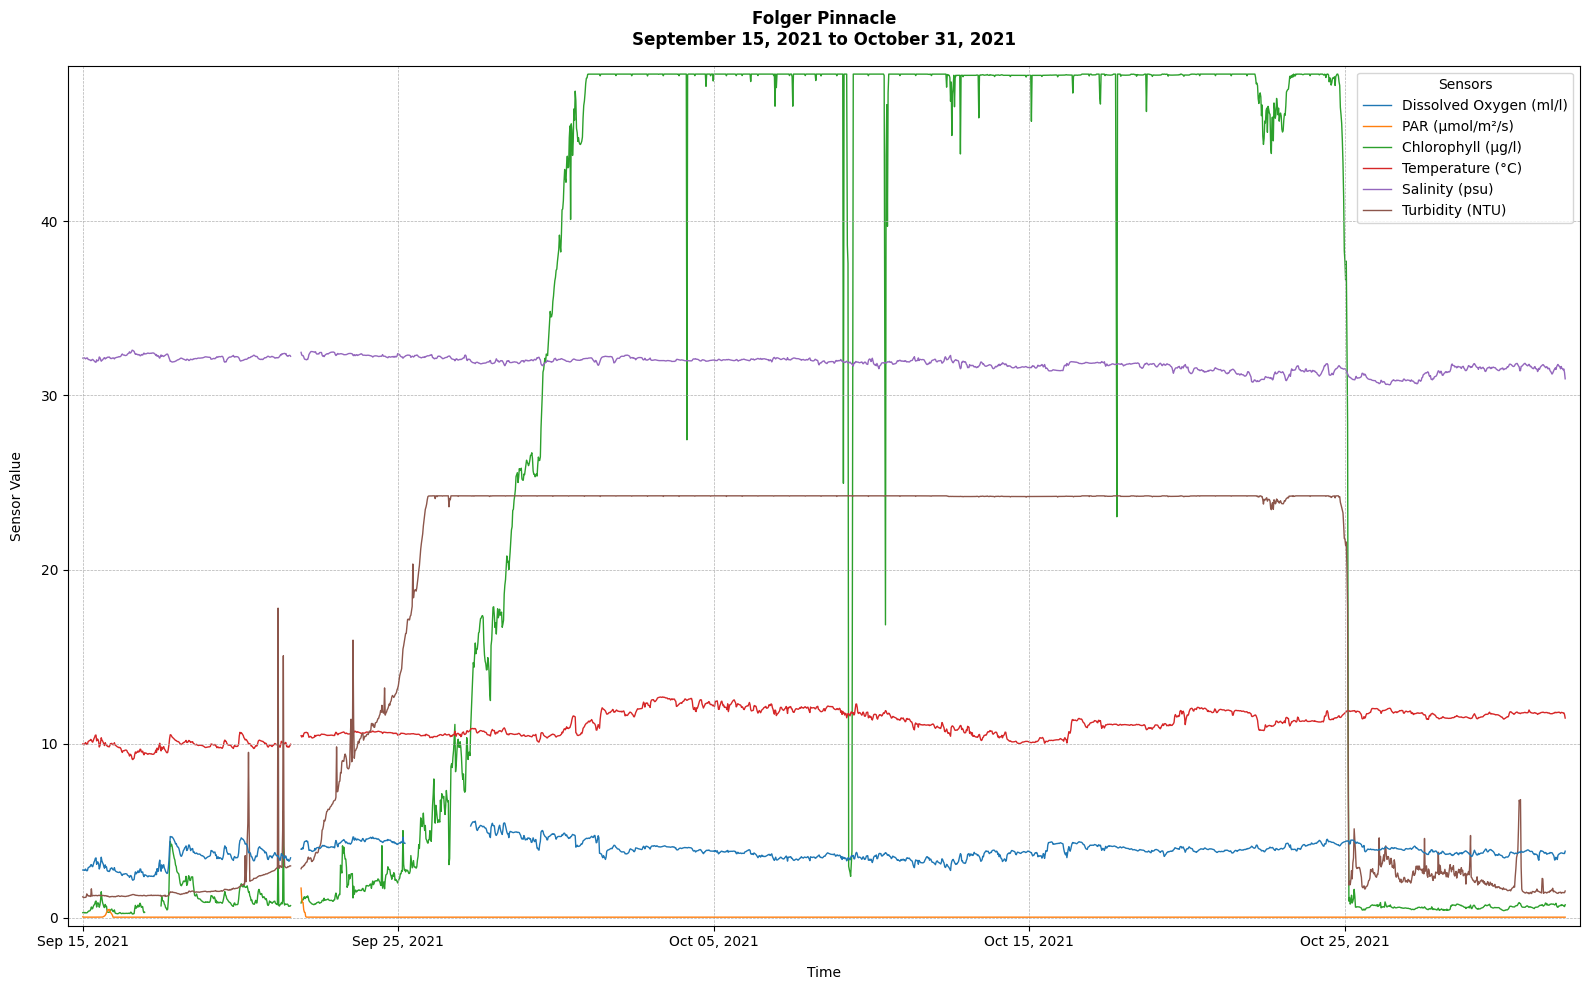

In [22]:
# September through November
hh.plot_all(df=high_chlor_indicators, title="Folger Pinnacle")

## Oxygen against all other parameters

### Entire Season - Apr to Nov

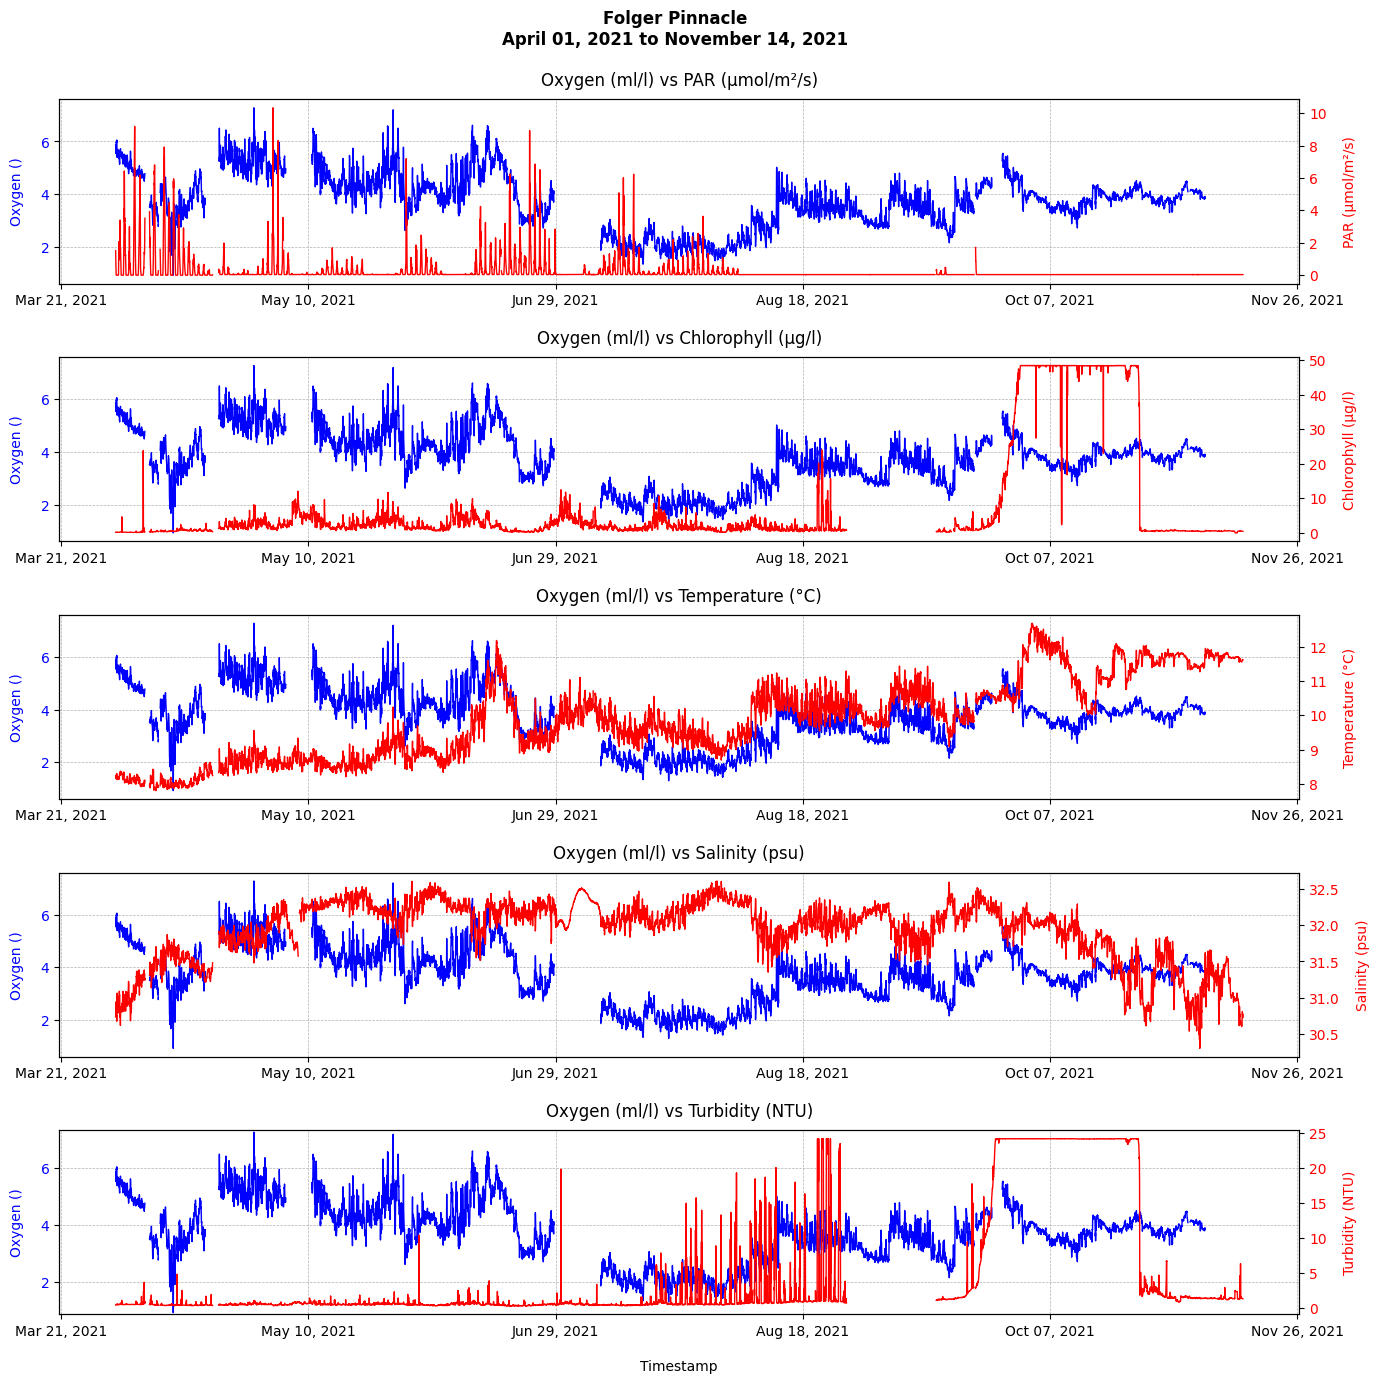

In [23]:
hh.subplot_all_with_oxygen(df=season_indicators, title= "Folger Pinnacle")

### Low Oxygen - Jul to Aug

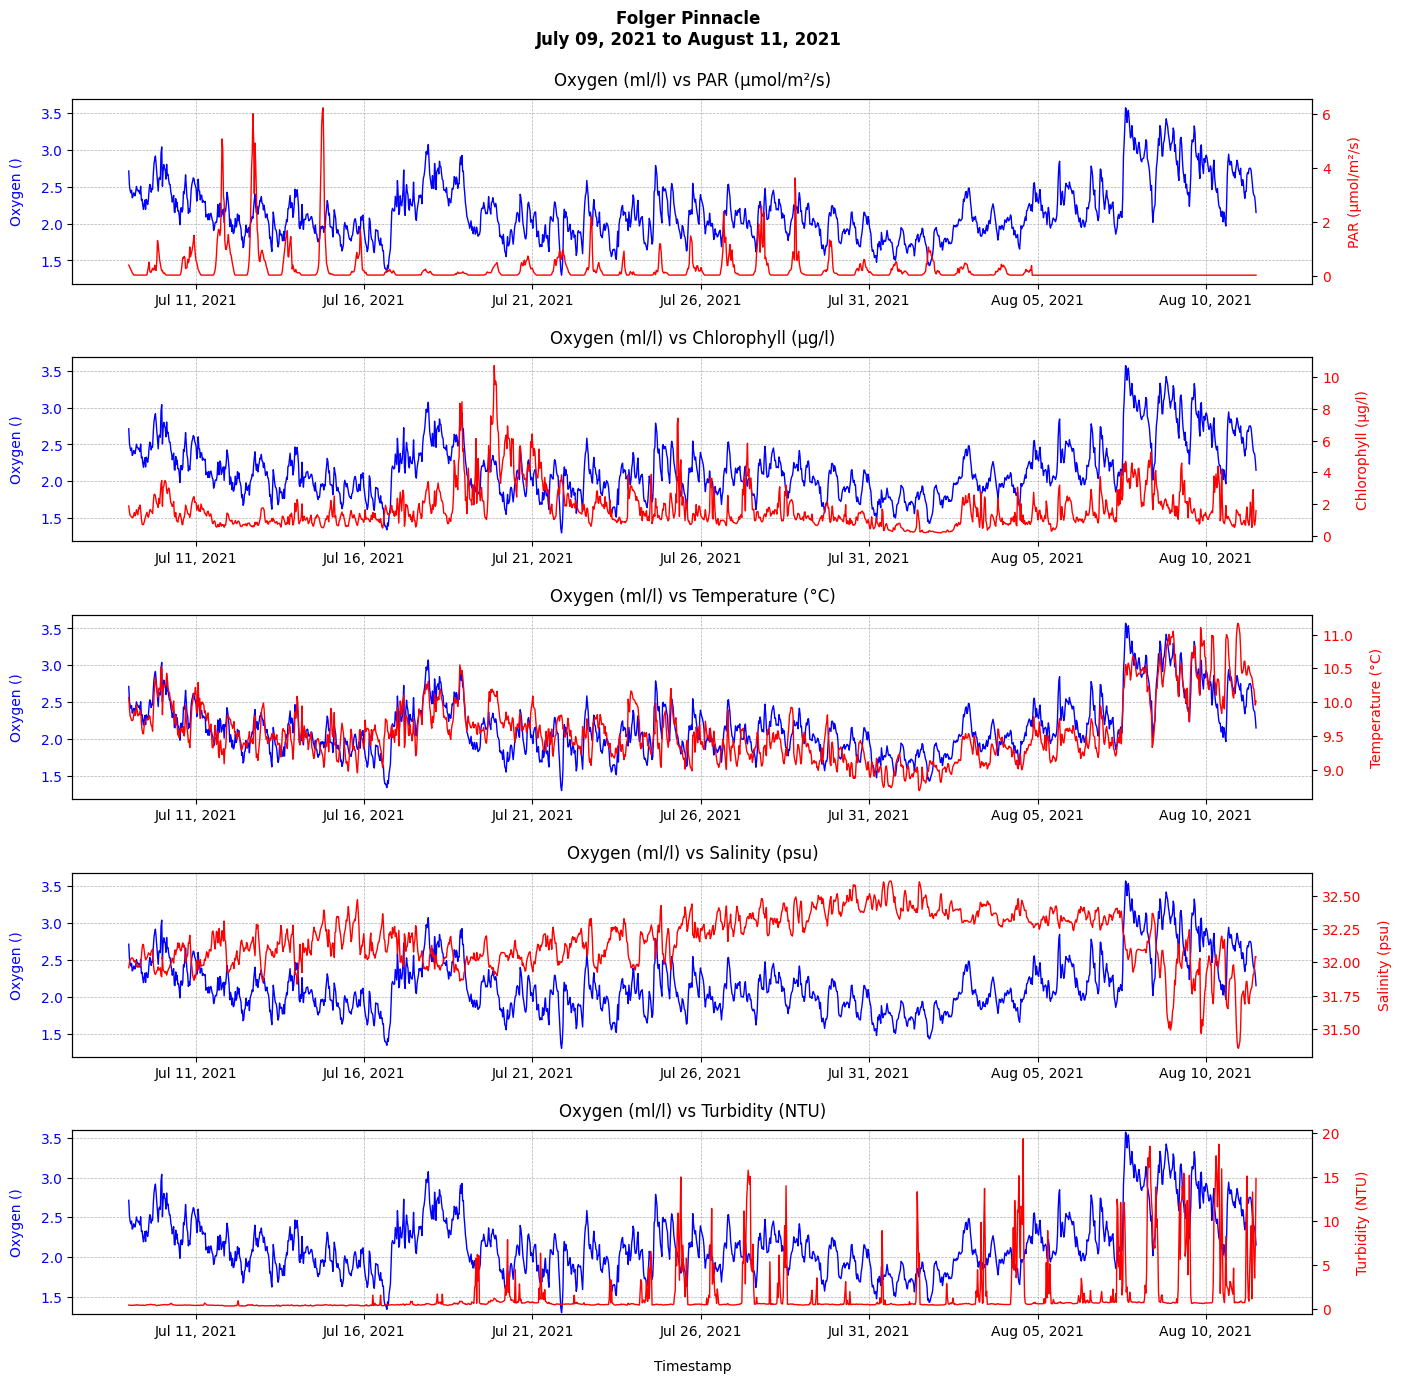

In [24]:
# July through August- Low oxygen
hh.subplot_all_with_oxygen(df=low_ox_indicators, title= "Folger Pinnacle")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>